<a href="https://colab.research.google.com/github/sidds4474/Mobile-Price-Range-Classification-ML/blob/main/Mobile_Price_Range_Classification_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Mobile Price Range Classification </u></b>

## *Problem Description : In this competitive market compnaies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of mobile phone(eg. RAM, Internal Memory, etc.) and its selling price. In this problem, we don have to predict price but a price range indicating how hiight the price is.*

# Attributes in this data:

**id**: ID

**battery_power**: Total energy a battery can store in one time measured in mAh

**blue**: Has bluetooth or not

**clock_speed**: speed at which microprocessor executes instructions

**dual_sim**: Has dual sim support or not
fc:Front Camera mega pixels

**four_g**: Has 4G or not

**int_memory**: Internal Memory in Gigabytes
m_dep:Mobile Depth in cm

**mobile_wt**: Weight of mobile phone

**n_cores**: Number of cores of processor

**pc**: Primary Camera mega pixels

**px_height**: Pixel Resolution Height

**px_width**: Pixel Resolution Width

**ram**: Random Access Memory in Megabytes

**sc_h**: Screen Height of mobile in cm

**sc_w**: Screen Width of mobile in cm

**talk_time**: Longest time that a single battery charge will last when you are

**three_g**: Has 3G or not

**touch_screen**: Has touch screen or not

**wifi**: Has wifi or not

**Price_range** : This is the target variable with value of

0(low cost),
1(medium cost),
2(high cost) and
3(very high cost).

Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999
import seaborn as sns
# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [2]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the data file

data = pd.read_csv('/content/drive/MyDrive/Mobile Price Range Prediction - Capstone Project/data_mobile_price_range.csv',encoding = 'latin' )

In [4]:
data.head(-5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,1617,1,2.4,0,8,1,36,0.8,85,1,9,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,19,4,743,3579,19,8,20,1,1,0,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,4,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,0,888,1099,3962,15,11,5,1,1,1,3


In [6]:
# Learning about the rows and colums

print(data.shape)
print(f'Total Rows = {data.shape[0]}\nTotol Columns = {data.shape[1]} ')

(2000, 21)
Total Rows = 2000
Totol Columns = 21 


In [7]:
# Getting all the columns name
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
# Checking the datatypes, non null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

*   We don't have any object data type in our data set.Also we have Zero null values in data set.

* Price_range is our target variable.



In [8]:
# Unique values
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [10]:
# Checking Null values
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

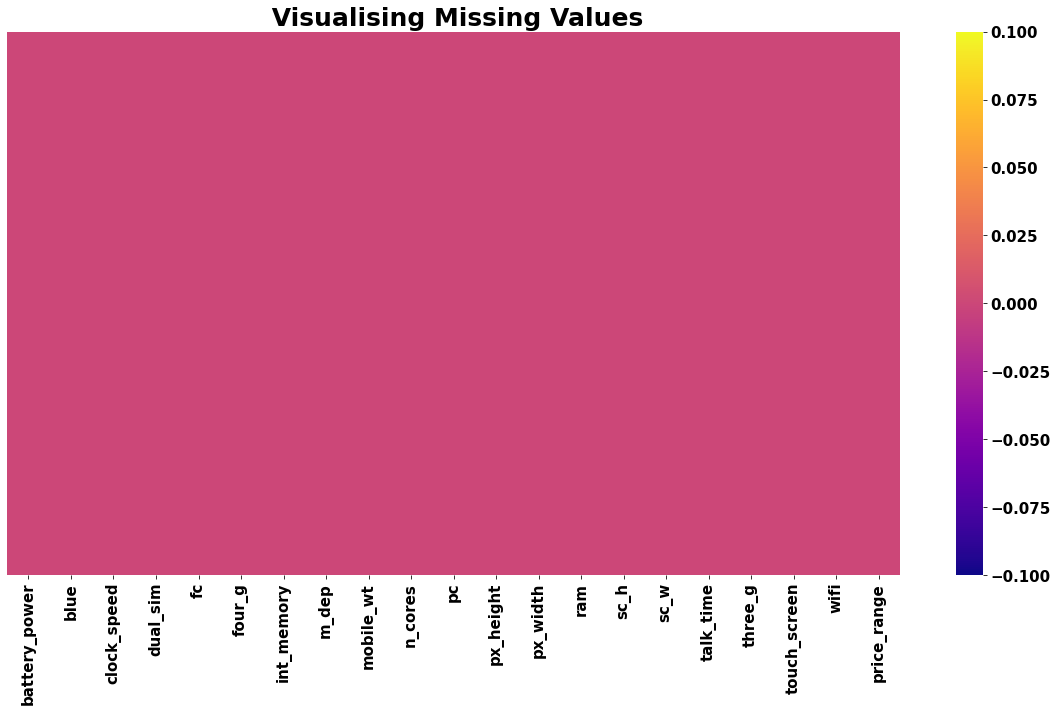

In [32]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")
plt.show()

No Null values found which is good thing for us.

In [17]:
# Checking Statistic of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Some Basic Observations:

We can see that sc_width and px_height has minimum value 0. which is not possible in any mobile. We need to handle this mismatch.

In [19]:
# Checking How many observations having screen width value as 0.
print(data[data['sc_w']==0].shape[0])

180


In [20]:
# Checking How many observations having px_hieght value as 0.
print(data[data['px_height']==0].shape[0])

2


In [22]:
# As there are only 2 observations having px_height=0. so we will drop it.
mobile_data=data[data['px_height']!=0]

Nearest Neighbors Imputations (KNNImputer)
Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

Before using KNN Imputer we need to replace 0 with NAN values. so that it will work.

In [23]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
data['sc_w'] = data['sc_w'].replace(0,np.nan)

In [24]:
# import KNN imputer frio sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
data=pd.DataFrame(impute_knn.fit_transform(data),columns=data.columns)

In [25]:
# Checking shape
mobile_data.shape

(1998, 21)

In [26]:
# Checking How many observations having sc_w value as 0.
data[data['sc_w']==0].shape[0]

0

Thus we have handled the mismatched values of the data.

## **EXPLORATORY DATA ANALYSIS**

In [28]:
# lets have look at our target variable's counts
price_range_values=data['price_range'].value_counts()
price_range_values

1.0    500
2.0    500
3.0    500
0.0    500
Name: price_range, dtype: int64

We have almost equal number of obseravtions for each category. Thus we don't have imbalanced target variable. Accuracy score will be the best evalaution metric for us to select the model.

This is the target variable with value of

0=low cost,
1=medium cost,
2=high cost,
3=very high cost.

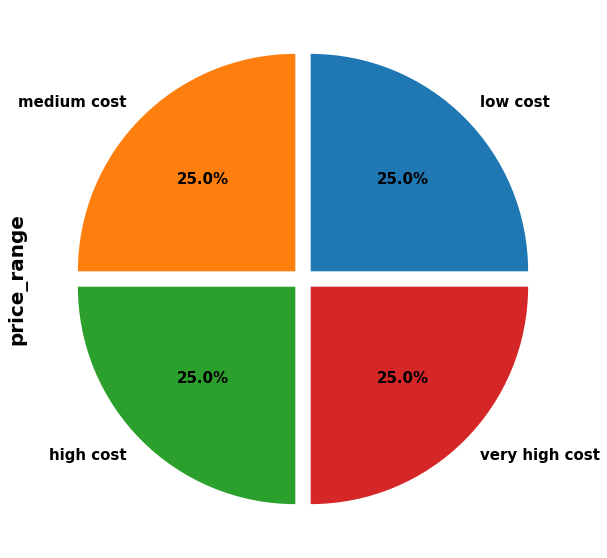

In [31]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(20,10),fontsize=15)    # plotting pie chart
plt.show()

We can see that our target varibale is equally distributed.
Thus we don't have to worry about data imbalance as there is no need of oversampling or undersampling which is good for us.

### **Correlation of target varaible i.e Dependent variable with the other independent variable.**

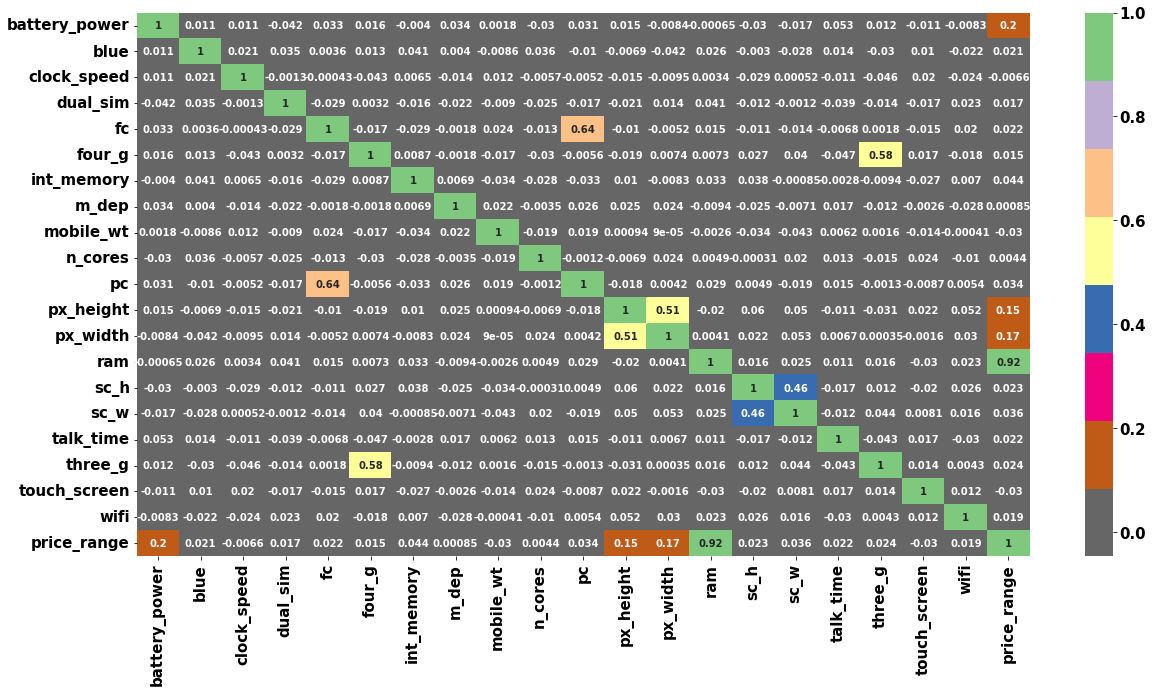

In [33]:
corr= data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)
plt.show()

Observations:
*   RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.

*   Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.

*   Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.

*   Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.

* Primary camera i.e pc and front camera fc are positively correlated, sc_h and sc_w are positively correlated.




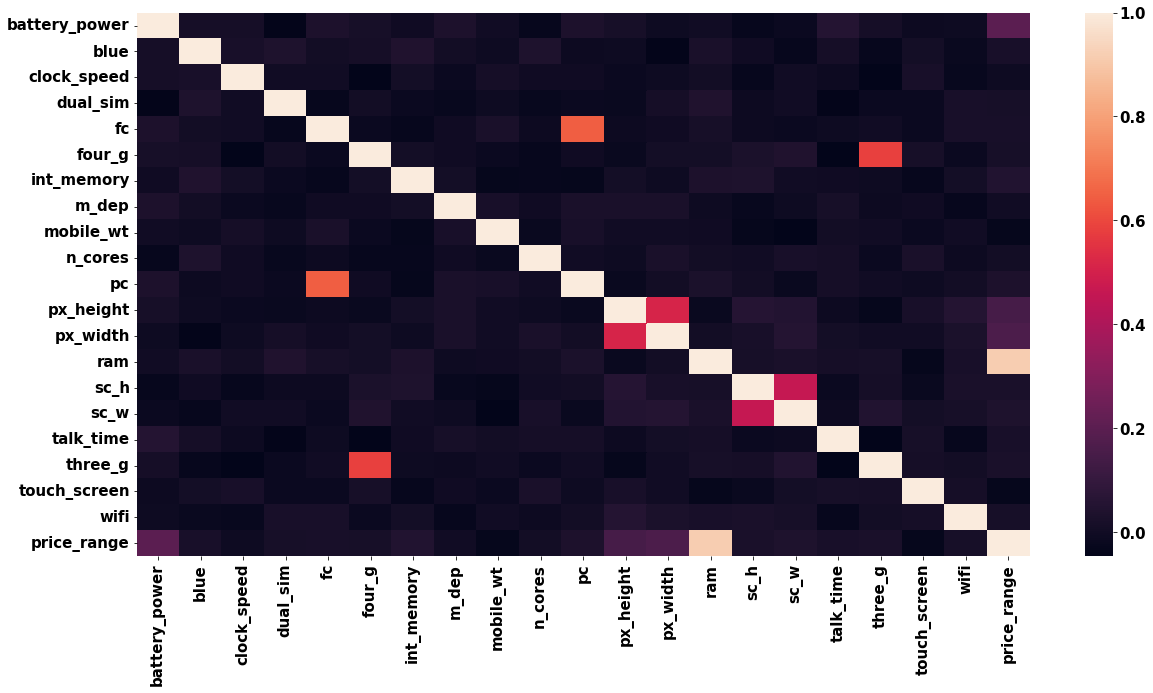

In [27]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr())
plt.show()

## Plotting Relation between Price Range & Battery Power

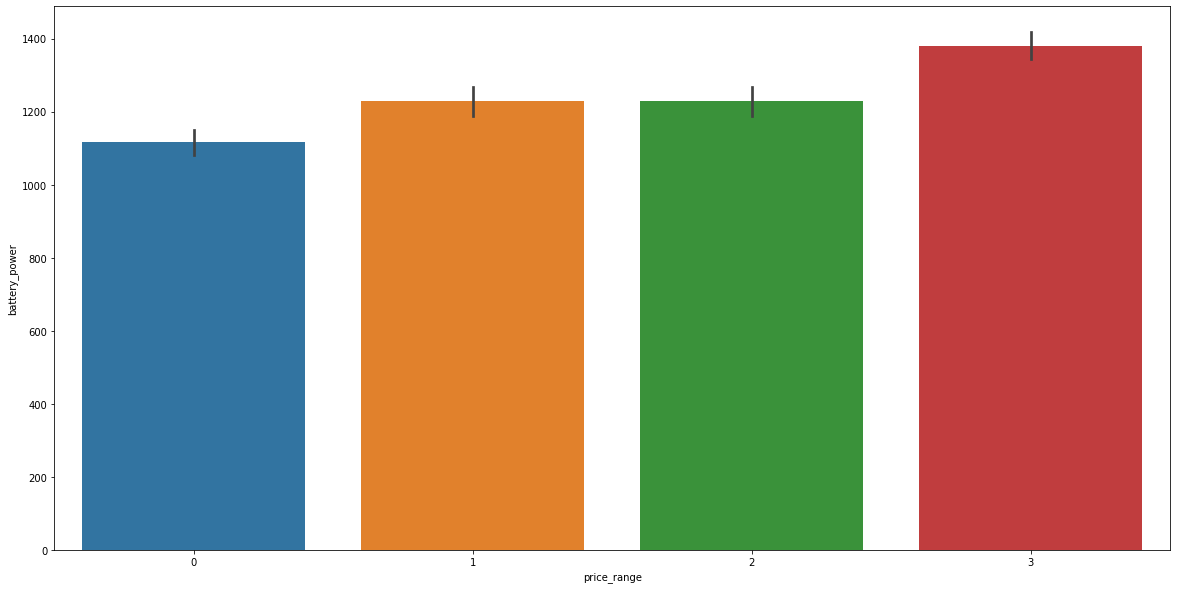

In [11]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'price_range', y = 'battery_power', data=data)
plt.show()

## Plotting Relation between Price Range & Pixel Height/Width

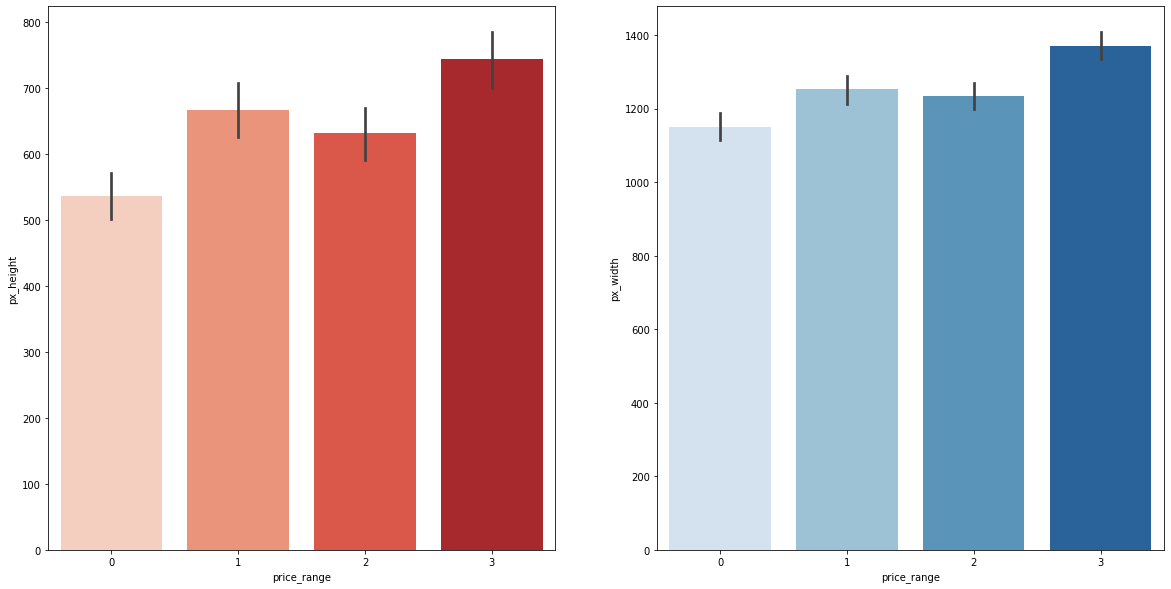

In [12]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.barplot(x = 'price_range', y = 'px_height', data=data, palette = 'Reds')
plt.subplot(1,2,2)
sns.barplot(x = 'price_range', y = 'px_width', data=data , palette = 'Blues')
plt.show()

## Plotting Relation between Price Range & RAM

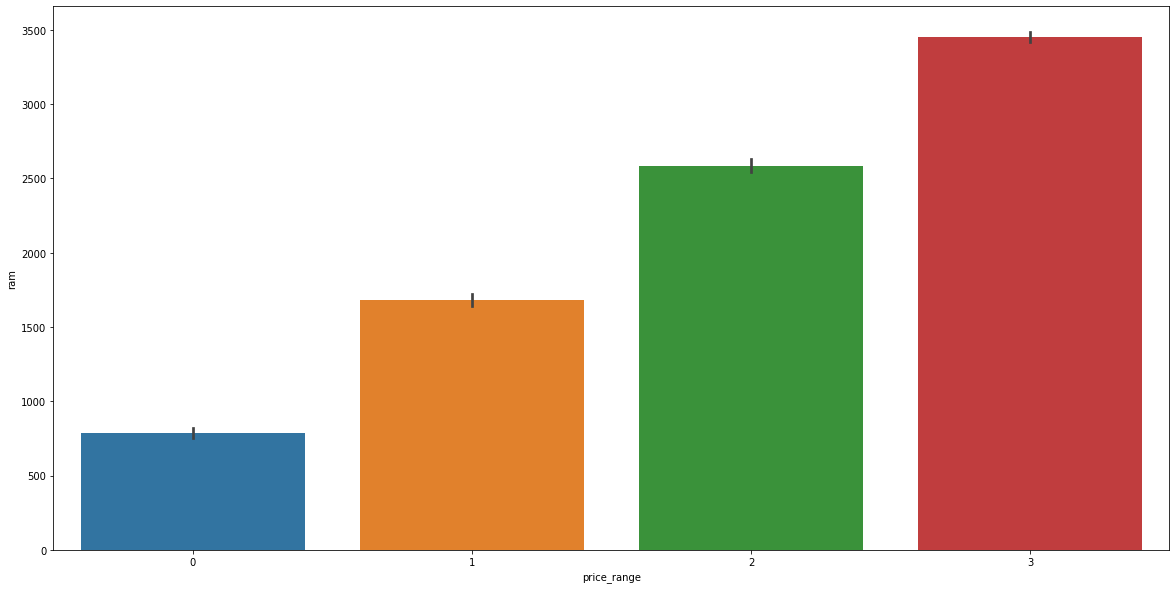

In [13]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'price_range', y = 'ram',data=data)
plt.show()

## Plotting Relation between Price Range & 3G/4G

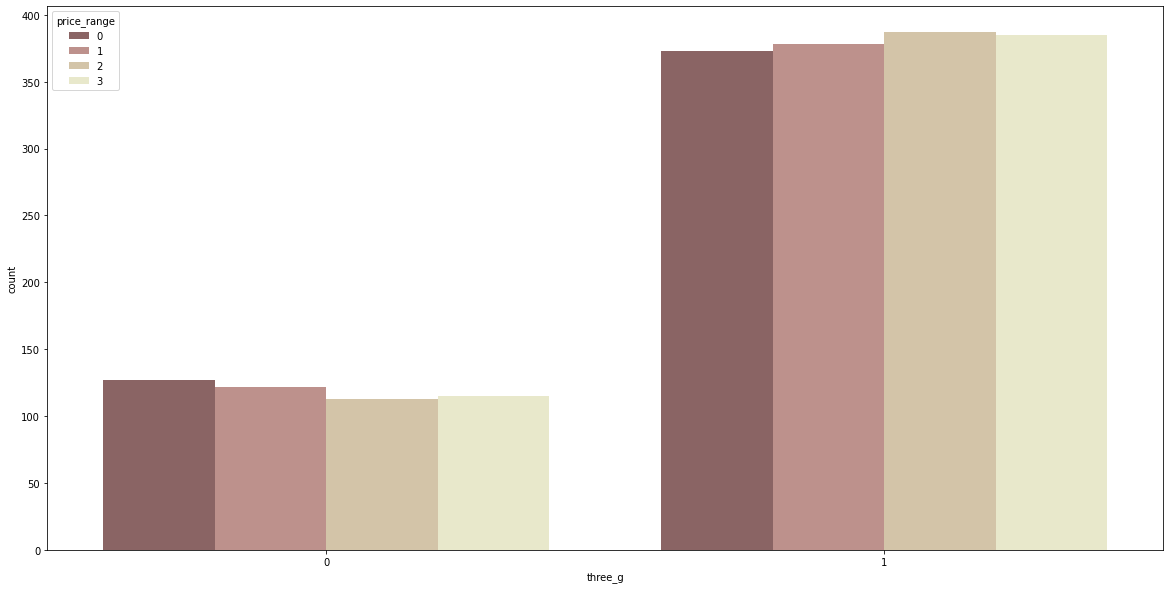

In [14]:
plt.figure(figsize = (20,10))
sns.countplot(data['three_g'] , hue = data['price_range'] , palette = 'pink')
plt.show()

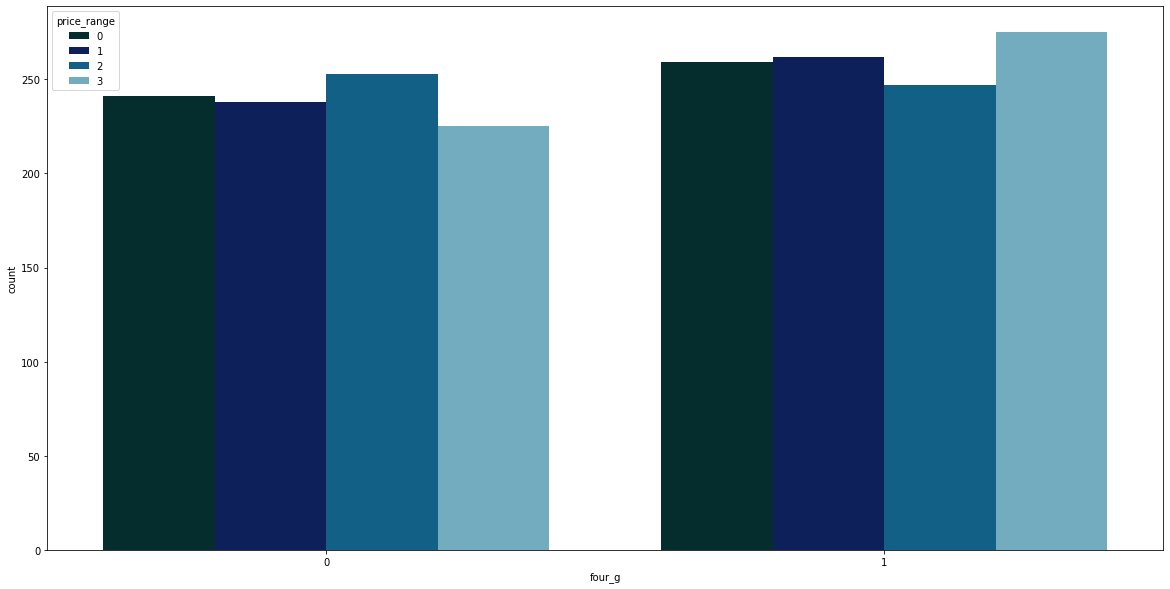

In [15]:
plt.figure(figsize = (20,10))
sns.countplot(data['four_g'] , hue = data['price_range'] , palette = 'ocean')
plt.show()

## Plotting Relation between Price Range & Memory

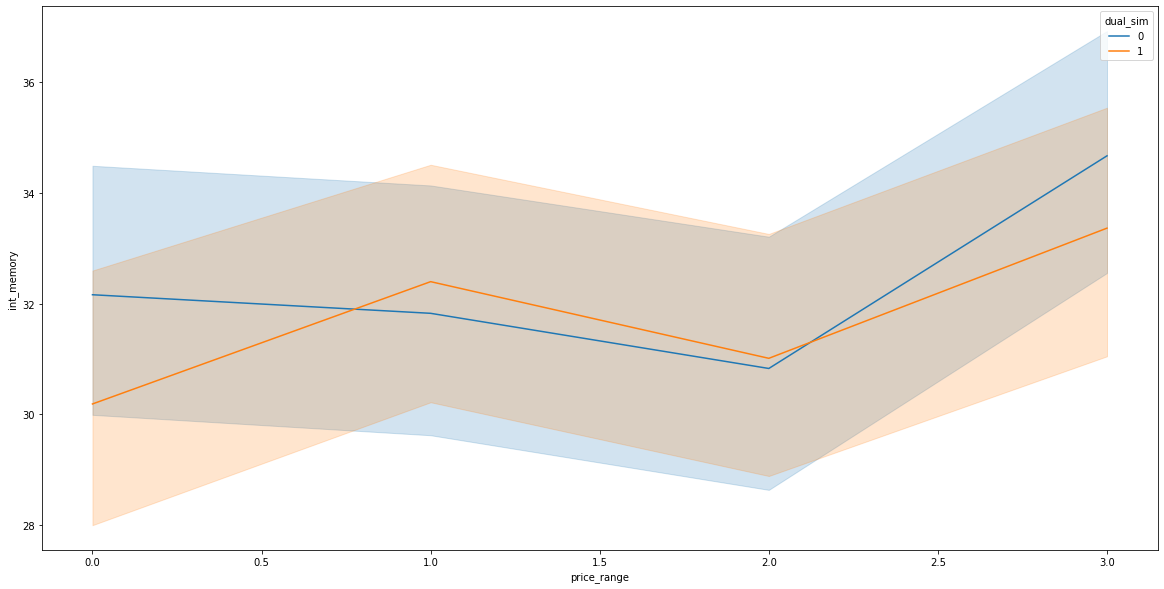

In [16]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'price_range' , y = 'int_memory' , data = data , hue = 'dual_sim')
plt.show()